In [18]:
import sys

sys.path.append("../")

from utils import open_pickle
from utils import check_solution
from cube3_game import Cube3Game
from models import Pilgrim, PilgrimTransformer, PilgrimSimple, PilgrimCNN, PilgrimMLP2

import numpy as np
import torch

from g_datasets import *
import importlib
import a_search_mix

# Reload the a_search_mix module
importlib.reload(a_search_mix)

# Now you can use AStarVector from the reloaded module
from a_search_mix import AStarVector

import matplotlib.pyplot as plt 

In [2]:
optimum = open_pickle("../assets/data/deepcubea/data_0.pkl")
deepcube_res = open_pickle("../assets/data/deepcubea/results.pkl")
report = open_pickle("../assets/reports/Cube3ResnetModel_value_policy_3_8B_14M_search_value_full.pkl")
game = Cube3Game("../assets/envs/qtm_cube3.pickle")
generators = torch.tensor(game.actions, dtype=torch.int64)

In [3]:
state_size = game.actions.shape[1]
hash_vec = torch.randint(0, 1_000_000_000_000, (state_size,))  

In [6]:
scrambles_dict = open_pickle("../assets/lengths/scrambles_dict.pkl")
path_finder_solutions = open_pickle("../assets/lengths/path_finder_solutions.pkl")

In [15]:
true_lengths = [len(sl) for sl in path_finder_solutions["path_finder_solutions"]]
lengths = scrambles_dict["lengths"].astype(int).tolist()

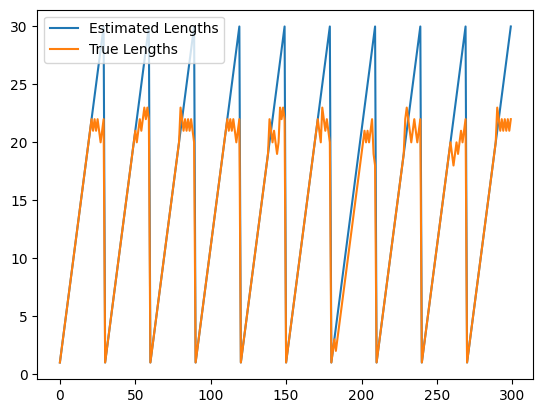

In [20]:
plt.plot(lengths, label='Estimated Lengths')
plt.plot(true_lengths, label='True Lengths')
plt.legend()
plt.show()

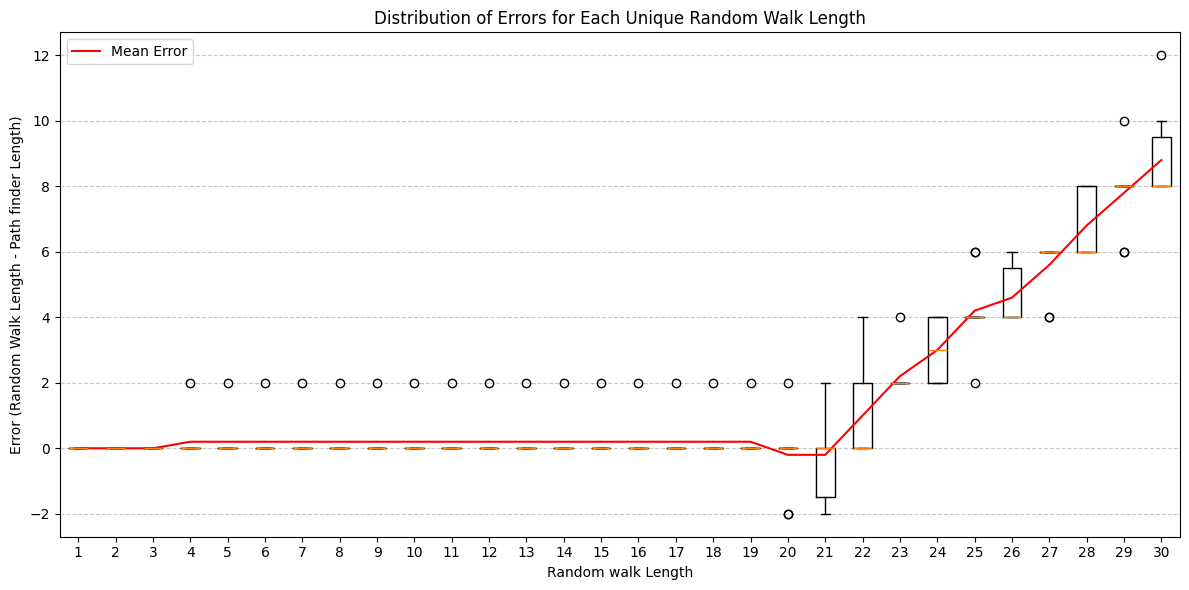

Overall mean error: 1.56
Overall standard deviation of errors: 2.6819893114378117


In [28]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Calculate errors
errors = np.array(lengths) - np.array(true_lengths)

# Group errors by unique length values
error_by_length = defaultdict(list)
for length, error in zip(lengths, errors):
    error_by_length[length].append(error)

# Calculate statistics for each unique length
unique_lengths = sorted(set(lengths))
mean_errors = [np.mean(error_by_length[length]) for length in unique_lengths]
std_errors = [np.std(error_by_length[length]) for length in unique_lengths]

# Plot error distribution for each unique length
plt.figure(figsize=(12, 6))
plt.boxplot([error_by_length[length] for length in unique_lengths], positions=unique_lengths)

plt.title('Distribution of Errors for Each Unique Random Walk Length')
plt.xlabel('Random walk Length')
plt.ylabel('Error (Random Walk Length - Path finder Length)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add mean error line
plt.plot(unique_lengths, mean_errors, color='red', label='Mean Error')

plt.legend()
plt.tight_layout()
plt.show()

# Print some statistics
print("Overall mean error:", np.mean(errors))
print("Overall standard deviation of errors:", np.std(errors))


In [26]:
for i in range(1, 30):
    std_error = np.std(error_by_length[i])
    mean_errors = np.mean(error_by_length[i])
    print(f"L: {i}, Mean: {mean_errors}, Std: {std_error}")

L: 1, Mean: 0.0, Std: 0.0
L: 2, Mean: 0.0, Std: 0.0
L: 3, Mean: 0.0, Std: 0.0
L: 4, Mean: 0.2, Std: 0.6000000000000001
L: 5, Mean: 0.2, Std: 0.6000000000000001
L: 6, Mean: 0.2, Std: 0.6000000000000001
L: 7, Mean: 0.2, Std: 0.6000000000000001
L: 8, Mean: 0.2, Std: 0.6000000000000001
L: 9, Mean: 0.2, Std: 0.6000000000000001
L: 10, Mean: 0.2, Std: 0.6000000000000001
L: 11, Mean: 0.2, Std: 0.6000000000000001
L: 12, Mean: 0.2, Std: 0.6000000000000001
L: 13, Mean: 0.2, Std: 0.6000000000000001
L: 14, Mean: 0.2, Std: 0.6000000000000001
L: 15, Mean: 0.2, Std: 0.6000000000000001
L: 16, Mean: 0.2, Std: 0.6000000000000001
L: 17, Mean: 0.2, Std: 0.6000000000000001
L: 18, Mean: 0.2, Std: 0.6000000000000001
L: 19, Mean: 0.2, Std: 0.6000000000000001
L: 20, Mean: -0.2, Std: 1.077032961426901
L: 21, Mean: -0.2, Std: 1.4000000000000001
L: 22, Mean: 1.0, Std: 1.3416407864998738
L: 23, Mean: 2.2, Std: 0.6
L: 24, Mean: 3.0, Std: 1.0
L: 25, Mean: 4.2, Std: 1.0770329614269007
L: 26, Mean: 4.6, Std: 0.91651513

In [31]:
np.max(true_lengths)

23